In [262]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data.csv')
df=df[['confirmados','recuperados','ativos','obitos','internados','internados_uci']]
df['pop.portuguesa']=10280000
df['suscetiveis']=df['pop.portuguesa']-df['confirmados']
df['confirmados_novos']=df['confirmados'].diff()
df['recuperados_novos']=df['recuperados'].diff()
df['S->I']=df['confirmados_novos']/df['suscetiveis']
df['S->S']=1-df['confirmados_novos']/df['suscetiveis']

In [264]:
init_state=list(df.iloc[len(df)-1,[7,2,4,5,3,1]])
S_S=np.mean(df.iloc[len(df)-11:len(df)-1,11])
S_I=1-S_S
a = np.array([[0.99,0.01,0.00,0.00,0.00,0.00],[0.00,0.80,4/100,1/100,0.00,0.15],[0.00,0.15,0.80,0.05,0.00,0.00],[0.00,0.00,0.05,0.80,0.15,0.00],[0.00,0.00,0.00,0.00,1.00,0.00],[0,0,0,0,0,1]])
a[0][0]=S_S
a[0][1]=S_I
a=np.transpose(a)

In [265]:
n_forecast=10
a_val,b_val,c_val,d_val,e_val,f_val = [],[],[],[],[],[]
for x in range(n_forecast):
    a_val.append(init_state[0])
    b_val.append(init_state[1])
    c_val.append(init_state[2])
    d_val.append(init_state[3])
    e_val.append(init_state[4])
    f_val.append(init_state[5])
    b = init_state
    init_state = a.dot(b)

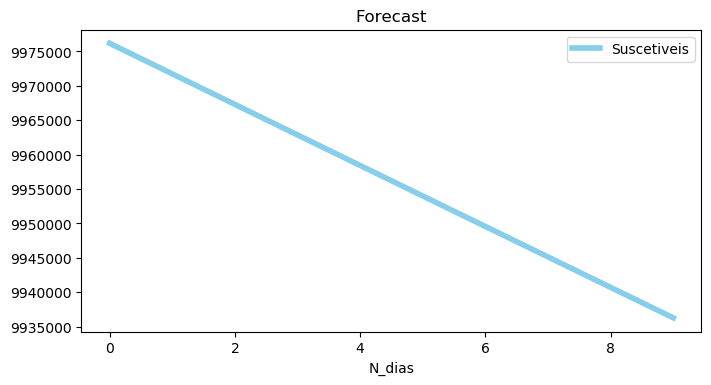

In [278]:
# plotting
plt.figure(figsize=(8,4), dpi=100)
plt.plot( [x for x in range(n_forecast)], a_val, color='skyblue', linewidth=4,label='Suscetiveis')
#axs[1].plot( [x for x in range(n_forecast)], c_val,color='yellow', linewidth=4,label='Hospitalizados')
#axs[2].plot( [x for x in range(n_forecast)], d_val,color='orange', linewidth=4,label='UCI')
#axs[3].plot( [x for x in range(n_forecast)], e_val, color='red', linewidth=4,label='Obitos')
#axs[4].plot( [x for x in range(n_forecast)], f_val, color='green', linewidth=4,label='Recuperados')
plt.title('Forecast')
plt.xlabel('N_dias')
plt.legend(loc='best')

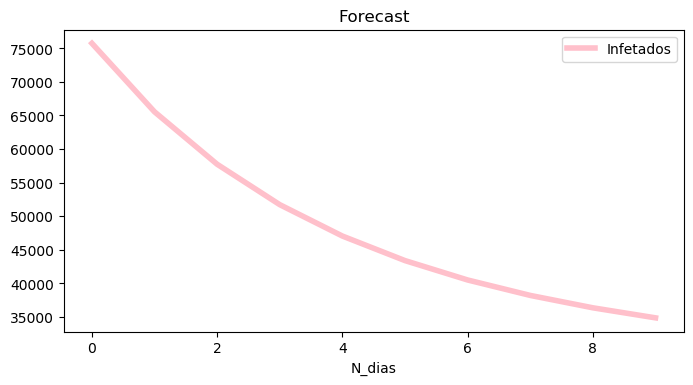

In [279]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot( [x for x in range(n_forecast)], b_val,color='pink', linewidth=4,label='Infetados')
plt.title('Forecast')
plt.xlabel('N_dias')
plt.legend(loc='best')

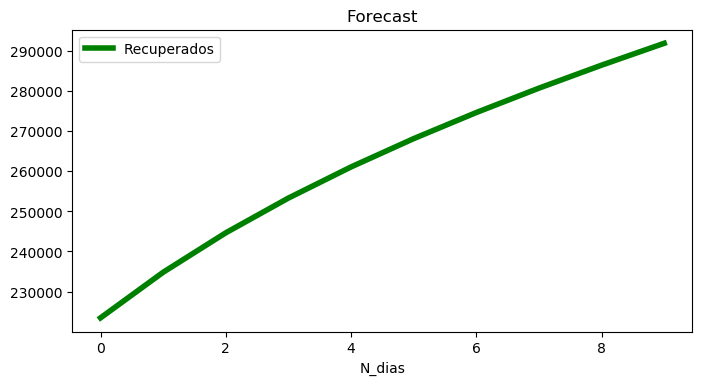

In [283]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot( [x for x in range(n_forecast)], f_val, color='green', linewidth=4,label='Recuperados')
plt.title('Forecast')
plt.xlabel('N_dias')
plt.legend(loc='best')

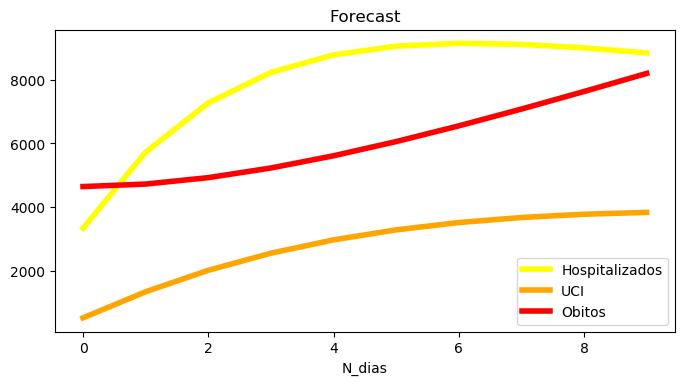

In [282]:
# plotting
plt.figure(figsize=(8,4), dpi=100)
plt.plot( [x for x in range(n_forecast)], c_val,color='yellow', linewidth=4,label='Hospitalizados')
plt.plot( [x for x in range(n_forecast)], d_val,color='orange', linewidth=4,label='UCI')
plt.plot( [x for x in range(n_forecast)], e_val, color='red', linewidth=4,label='Obitos')
plt.title('Forecast')
plt.xlabel('N_dias')
plt.legend(loc='best')

## TESTE

In [284]:
# transition matrix
#(1) Non Infected (in the General Population); (2)
#Infected (isolated at home); (3) Hospitalized (after becoming ill); (4) in the ICU (or ventilators);
#and (5) Dead (absorbing state; no possible return)
import numpy as np
a = np.array([[0.99,0.01,0.00,0.00,0.00,0.00],[0.00,0.80,4/100,1/100,0.00,0.15],[0.00,0.15,0.80,0.05,0.00,0.00],[0.00,0.00,0.05,0.80,0.15,0.00],[0.00,0.00,0.00,0.00,1.00,0.00],[0,0,0,0,0,1]])
a=np.transpose(a)

In [288]:
a_val,b_val,c_val,d_val,e_val,f_val = [],[],[],[],[],[]
init_state = np.array([1000000,0,0,0,0,0])
for x in range(300):
    a_val.append(init_state[0])
    b_val.append(init_state[1])
    c_val.append(init_state[2])
    d_val.append(init_state[3])
    e_val.append(init_state[4])
    f_val.append(init_state[5])
    b = init_state
    init_state = a.dot(b)

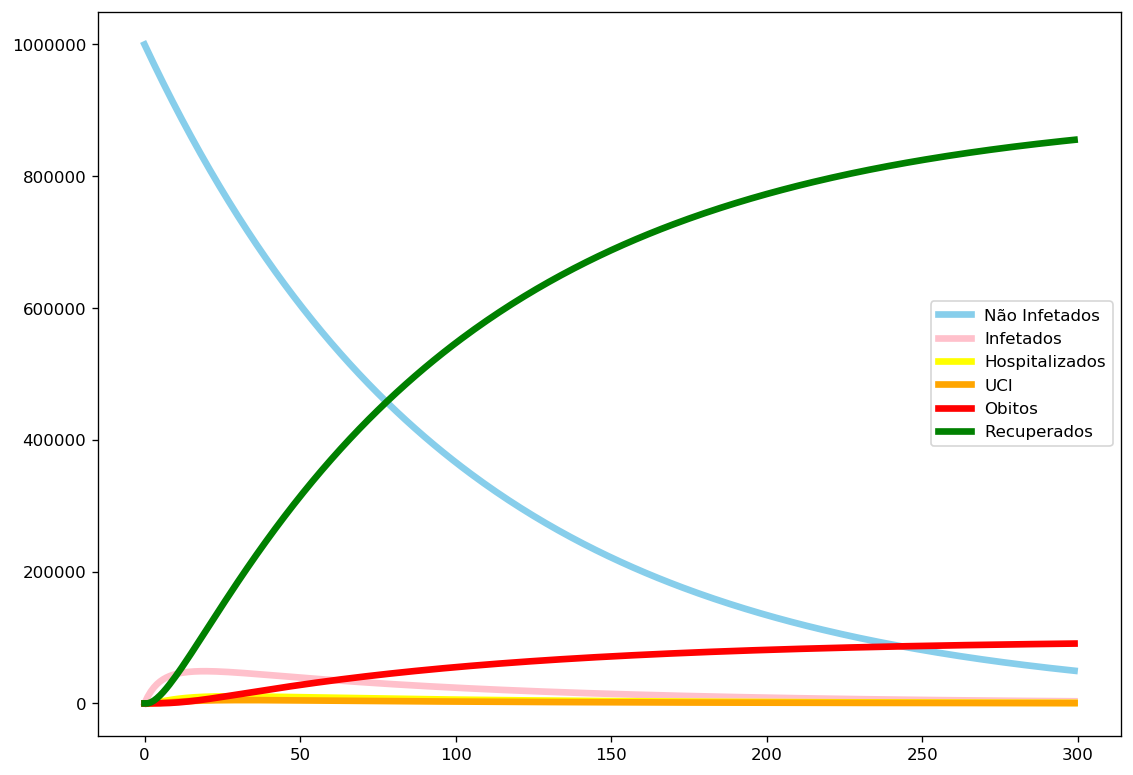

In [289]:
# plotting
plt.figure(figsize=(11,8))
plt.plot( [x for x in range(300)], a_val, color='skyblue', linewidth=4,label='Não Infetados')
plt.plot( [x for x in range(300)], b_val,color='pink', linewidth=4,label='Infetados')
plt.plot( [x for x in range(300)], c_val,color='yellow', linewidth=4,label='Hospitalizados')
plt.plot( [x for x in range(300)], d_val,color='orange', linewidth=4,label='UCI')
plt.plot( [x for x in range(300)], e_val, color='red', linewidth=4,label='Obitos')
plt.plot( [x for x in range(300)], f_val, color='green', linewidth=4,label='Recuperados')
plt.legend(loc='best')